### Whisp a feature collection

Import packages

In [ ]:
import ee

import pandas as pd

from pathlib import Path

from whisp.src.pd_schemas import data_lookup_type

from whisp.src.data_conversion import create_feature_collection

import whisp

ee.Authenticate()
ee.Initialize()


Get a feature collection

In [28]:
# asset_id = "projects/ee-whisp/assets/example_asset" # asset id
# asset_id = "projects/fdap-remi/assets/CFI_cocoa_GHA"
# roi = ee.FeatureCollection(asset_id) # load feature collection asset

# earthengine authenticate
GEOJSON_EXAMPLE_FILEPATH = (
    # # Path(__file__).parents[1] / "fixtures" / "geojson_example.geojson"
    # Path.cwd().parents[0]/ "test" / "fixtures" / "geojson_example.geojson"
    Path.cwd().parents[0]/ "input_examples" / "geojson_example.geojson"

)
print(GEOJSON_EXAMPLE_FILEPATH)
# print (roi.size().getInfo())


c:\Users\Arnell\Documents\GitHub\whisp_sustaain\input_examples\geojson_example.geojson


Whisp it

In [29]:
df_formatted_stats = whisp.whisp_formatted_stats_geojson_to_df(GEOJSON_EXAMPLE_FILEPATH)


Received geojson_filepath: c:\Users\Arnell\Documents\GitHub\whisp_sustaain\input_examples\geojson_example.geojson
Reading GeoJSON file from: c:\Users\Arnell\Documents\GitHub\whisp_sustaain\input_examples\geojson_example.geojson
using valid datasets filter due to error in input
Invalid image: ImageCollection.load: ImageCollection asset 'nope_projects/ee-globaloilpalm/assets/shared/GlobalOilPalm_YoP_2021' not found (does not exist or caller does not have access).
Invalid image: ImageCollection.load: ImageCollection asset 'projects/forestdatapartnership/assets/palm/palm_2020_model_20240312' not found (does not exist or caller does not have access).
{'type': 'Feature', 'geometry': None, 'id': '0', 'properties': {'Admin_Level_1': 'Ashanti Region', 'Centroid_lat': 6.159539574278987, 'Centroid_lon': -1.6119419952259373, 'Cocoa_ETH': 0, 'Cocoa_bnetd': 0, 'Country': 'GHA', 'ESA_TC_2020': 1.939, 'ESA_fire_2001': 0, 'ESA_fire_2002': 0, 'ESA_fire_2003': 0, 'ESA_fire_2004': 0, 'ESA_fire_2005': 0, '

In [30]:
df_formatted_stats

,Plot_id,Geo_id,Plot_area_ha,Geometry_type,Country,Admin_Level_1,Centroid_lon,Centroid_lat,Unit,water_flag,...,TMF_def_before_2020,GFC_loss_before_2020,ESA_fire_before_2020,MODIS_fire_before_2020,RADD_before_2020,TMF_deg_after_2020,TMF_def_after_2020,GFC_loss_after_2020,MODIS_fire_after_2020,RADD_after_2020
0,NaN,NaN,1.939000,Polygon,GHA,Ashanti Region,-1.611942,6.159540,ha,-,...,0.511,1.552000,0.000000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
1,NaN,NaN,4.152000,Polygon,GHA,Ashanti Region,-1.644732,6.104735,ha,-,...,2.880,2.724000,0.000000,0.000,0.00,0.000,0.089,0.743,0.000,0.000
2,NaN,NaN,16.600000,Polygon,GHA,Western Region,-2.157144,5.981149,ha,-,...,0.000,0.000000,0.000000,0.000,1.11,0.089,0.000,0.000,0.000,1.063
3,NaN,NaN,31.212999,Polygon,IDN,South Sumatra,103.956096,-3.054668,ha,-,...,22.218,31.021999,31.212999,6.403,0.00,0.000,0.000,0.000,0.000,0.000
4,NaN,NaN,1.964000,Polygon,IDN,South Sumatra,103.970371,-3.068831,ha,-,...,1.954,1.950000,0.000000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
5,NaN,NaN,12.725000,Polygon,IDN,South Sumatra,103.975182,-3.082922,ha,-,...,1.453,1.899000,0.000000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
6,NaN,NaN,20.882000,Polygon,IDN,South Sumatra,103.977512,-3.083808,ha,-,...,4.546,9.043000,0.000000,0.000,0.00,0.714,0.000,0.000,0.000,0.000
7,NaN,NaN,8.279000,Polygon,CIV,Lagunes,-4.101646,5.711935,ha,-,...,2.535,3.194000,0.000000,0.000,0.00,0.000,0.000,1.602,0.000,0.001
8,NaN,NaN,1.981000,Polygon,CIV,Lagunes,-4.086848,5.673811,ha,-,...,0.924,0.435000,0.000000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
9,NaN,NaN,3.797000,Polygon,CIV,District Autonome D'Abidjan,-4.119589,5.572136,ha,-,...,0.096,1.161000,0.000000,0.000,0.00,0.000,0.000,0.000,0.000,0.000


Export csv

In [18]:
# out_directory = 'C:/Users/Arnell/OneDrive - Food and Agriculture Organization/project_work/p0004_commodity_mapper_support/'
out_directory = "C:/Users/Arnell/Documents/GitHub/whisp_sustaain/notebooks/"
df_formatted_stats.to_csv(out_directory+'whisp_output_table.csv')

Calculate EUDR risk category

In [20]:
# Replace with name of your CSV file 
# NB if skipped 'Add Geo ids' should set to "out_directory/whisp_output_table.csv" 

csv_file_input =out_directory+'whisp_output_table.csv'

# import csv as a dataframe
df_w_stats = pd.read_csv(csv_file_input)

df_w_risk = whisp.whisp_risk(
    df = df_w_stats, 
    ind_1_pcent_threshold=10,
    ind_2_pcent_threshold=10,
    ind_3_pcent_threshold=0,
    ind_4_pcent_threshold=0,
    )


Display table with risk columns

In [21]:
df_w_risk

,Unnamed: 0,Plot_id,Geo_id,Plot_area_ha,Geometry_type,Country,Admin_Level_1,Centroid_lon,Centroid_lat,Unit,...,TMF_deg_after_2020,TMF_def_after_2020,GFC_loss_after_2020,MODIS_fire_after_2020,RADD_after_2020,Indicator_1_treecover,Indicator_2_commodities,Indicator_3_disturbance_before_2020,Indicator_4_disturbance_after_2020,EUDR_risk
0,0,NaN,NaN,1.939,Polygon,GHA,Ashanti Region,-1.611942,6.159540,ha,...,0.000,0.000,0.000,0.000,0.000,yes,no,yes,no,low
1,1,NaN,NaN,4.152,Polygon,GHA,Ashanti Region,-1.644732,6.104735,ha,...,0.000,0.089,0.743,0.000,0.000,yes,no,yes,yes,low
2,2,NaN,NaN,16.600,Polygon,GHA,Western Region,-2.157144,5.981149,ha,...,0.089,0.000,0.000,0.000,1.063,yes,no,yes,yes,low
3,3,NaN,NaN,31.213,Polygon,IDN,South Sumatra,103.956096,-3.054668,ha,...,0.000,0.000,0.000,0.000,0.000,yes,yes,yes,no,low
4,4,NaN,NaN,1.964,Polygon,IDN,South Sumatra,103.970371,-3.068831,ha,...,0.000,0.000,0.000,0.000,0.000,yes,no,yes,no,low
5,5,NaN,NaN,12.725,Polygon,IDN,South Sumatra,103.975182,-3.082922,ha,...,0.000,0.000,0.000,0.000,0.000,yes,no,yes,no,low
6,6,NaN,NaN,20.882,Polygon,IDN,South Sumatra,103.977512,-3.083808,ha,...,0.714,0.000,0.000,0.000,0.000,yes,no,yes,yes,low
7,7,NaN,NaN,8.279,Polygon,CIV,Lagunes,-4.101646,5.711935,ha,...,0.000,0.000,1.602,0.000,0.001,yes,yes,yes,yes,low
8,8,NaN,NaN,1.981,Polygon,CIV,Lagunes,-4.086848,5.673811,ha,...,0.000,0.000,0.000,0.000,0.000,yes,yes,yes,no,low
9,9,NaN,NaN,3.797,Polygon,CIV,District Autonome D'Abidjan,-4.119589,5.572136,ha,...,0.000,0.000,0.000,0.000,0.000,yes,no,yes,no,low


Export table with risk columns to csv 

In [22]:
output_file=out_directory+'whisp_output_table_w_risk.csv' # edit as required

df_w_risk.to_csv(output_file)

In [ ]:

# # Example usage
# csv_file_path = 'path/to/whisp_output_table_w_risk.csv'
# generate_plots_from_csv(csv_file_path)

Plot data

C:\Users\Arnell\Documents\GitHub\whisp_sustaain\whisp\src\plot_generator.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sum_df = pd.DataFrame(index=years, columns=products).fillna(0)
C:\Users\Arnell\Documents\GitHub\whisp_sustaain\whisp\src\plot_generator.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.319' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sum_df.loc[year, product] = df[column_name].sum()
C:\Users\Arnell\Documents\GitHub\whisp_sustaain\whisp\src\plot_generator.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.11' has dtype incompatibl

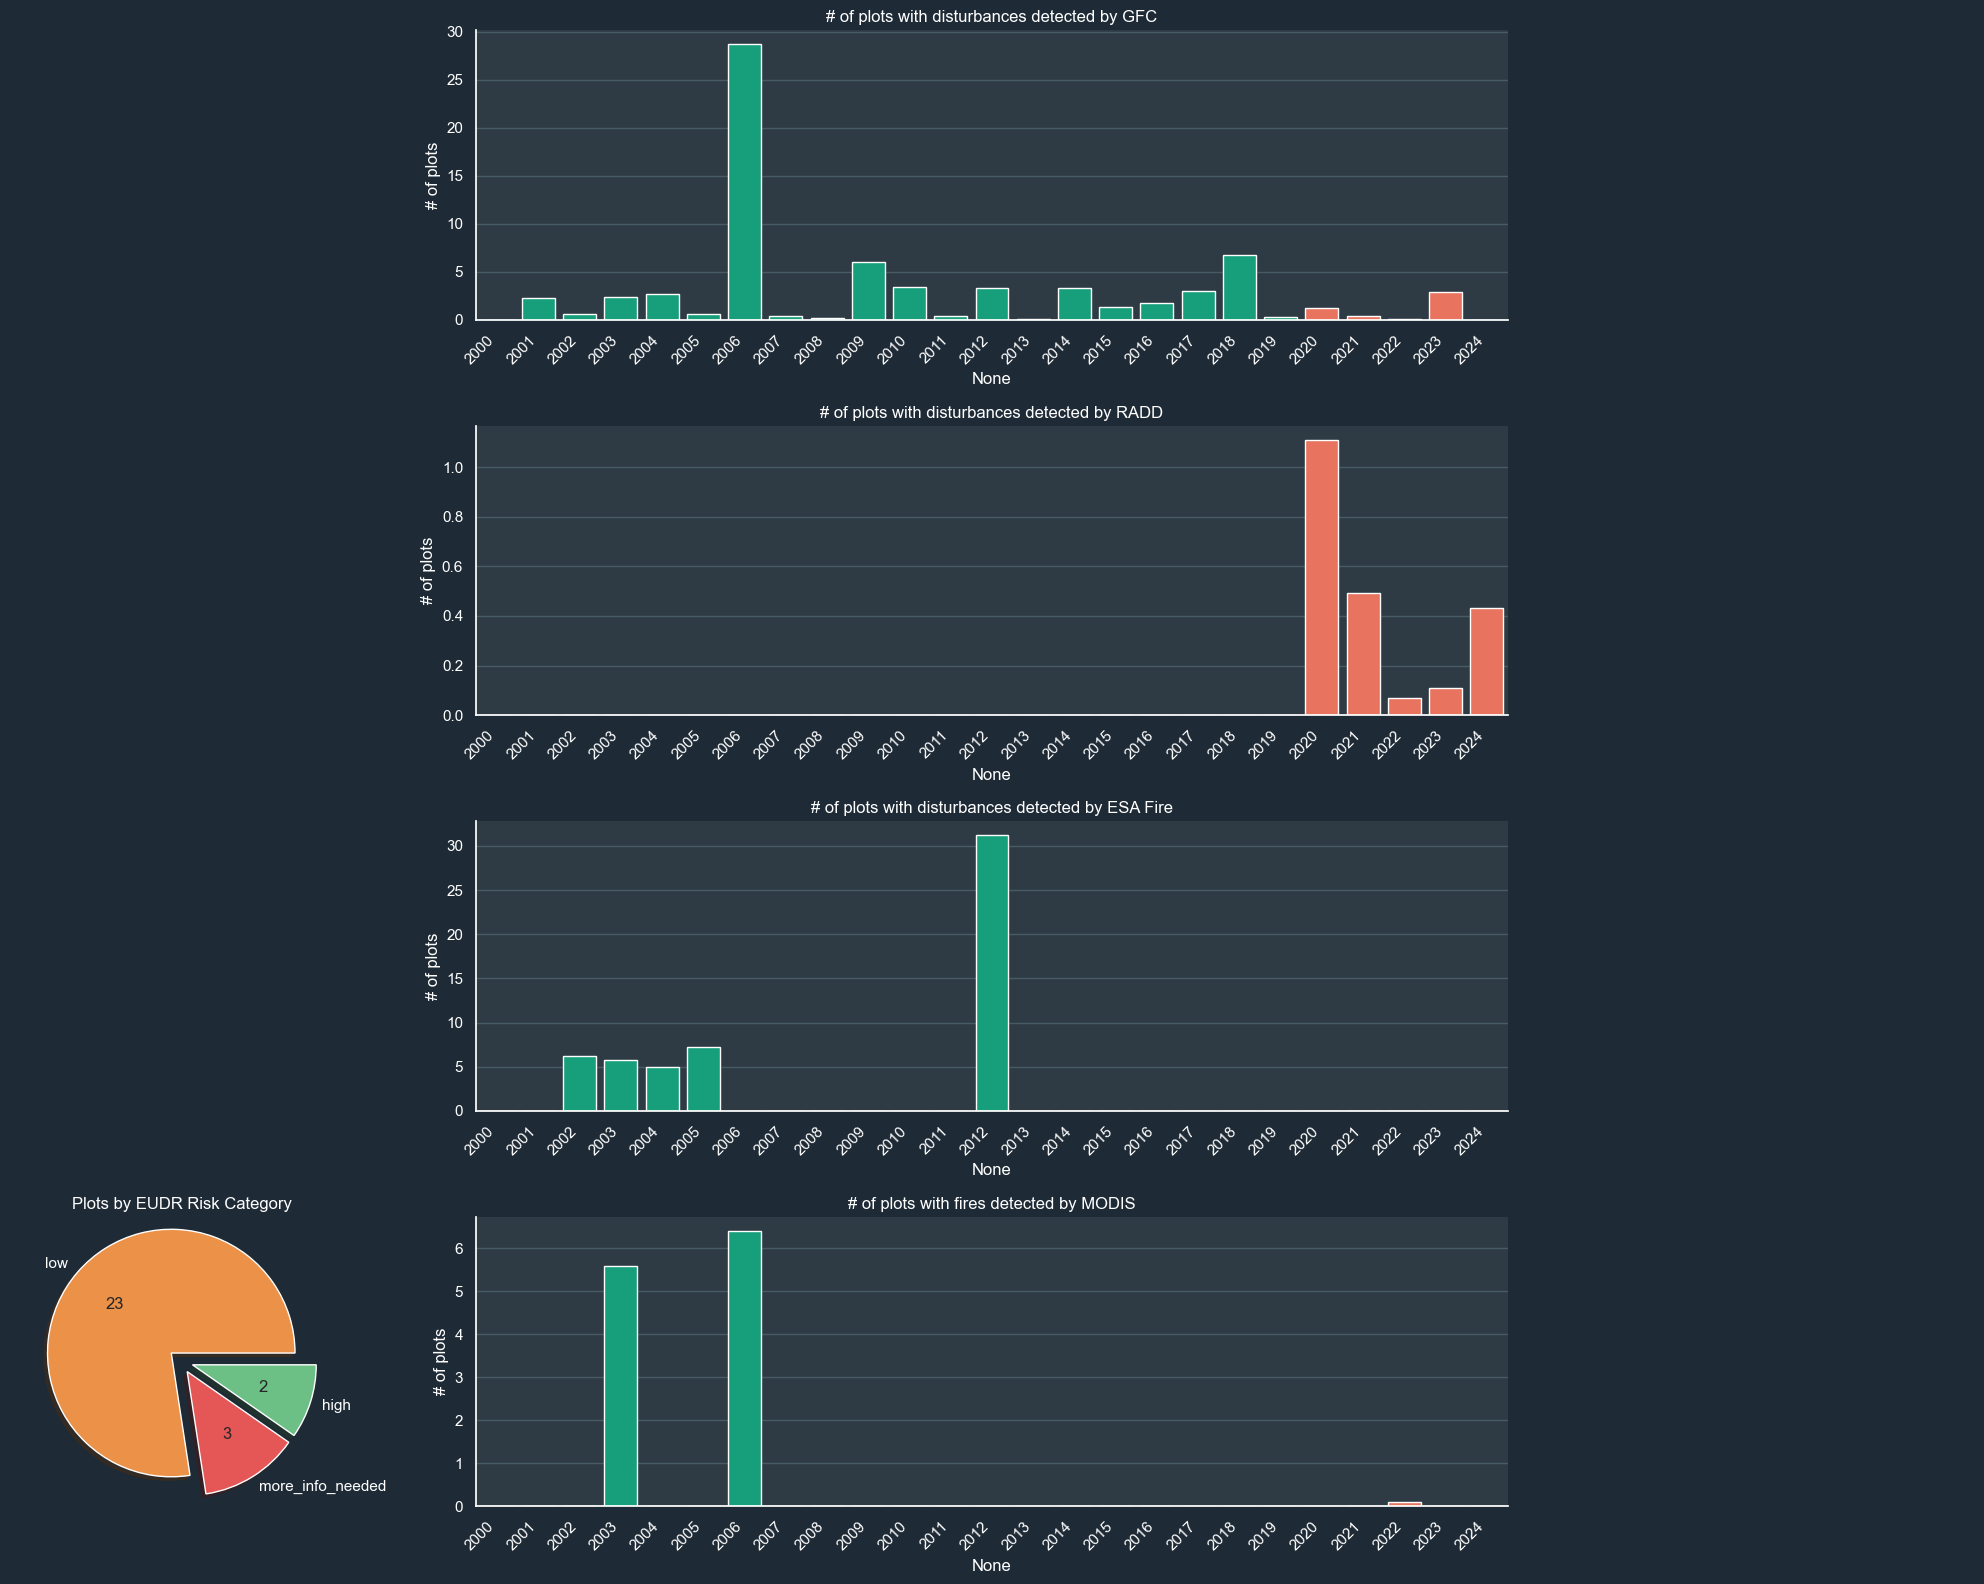

In [32]:
whisp.generate_plots_from_csv(output_file)

To drive - testing area

In [18]:

whisp.whisp_stats_geojson_to_drive(GEOJSON_EXAMPLE_FILEPATH)

Received geojson_filepath: c:\Users\Arnell\Documents\GitHub\whisp_sustaain\input_examples\geojson_example.geojson
Reading GeoJSON file from: c:\Users\Arnell\Documents\GitHub\whisp_sustaain\input_examples\geojson_example.geojson
['Plot_area_ha', 'KBA', 'Cocoa_bnetd', 'Oil_palm_Descals', 'ESA_fire_before_2020', 'ESA_fire_2001', 'ESA_fire_2002', 'ESA_fire_2003', 'ESA_fire_2004', 'ESA_fire_2005', 'ESA_fire_2006', 'ESA_fire_2007', 'ESA_fire_2008', 'ESA_fire_2009', 'ESA_fire_2010', 'ESA_fire_2011', 'ESA_fire_2012', 'ESA_fire_2013', 'ESA_fire_2014', 'ESA_fire_2015', 'ESA_fire_2016', 'ESA_fire_2017', 'ESA_fire_2018', 'ESA_fire_2019', 'ESA_fire_2020', 'ESA_TC_2020', 'Cocoa_ETH', 'Oil_palm_FDaP', 'GFC_TC_2020', 'GFC_loss_after_2020', 'GFC_loss_before_2020', 'GFC_loss_year_2001', 'GFC_loss_year_2002', 'GFC_loss_year_2003', 'GFC_loss_year_2004', 'GFC_loss_year_2005', 'GFC_loss_year_2006', 'GFC_loss_year_2007', 'GFC_loss_year_2008', 'GFC_loss_year_2009', 'GFC_loss_year_2010', 'GFC_loss_year_2011', 

In [71]:
#pip install PyDrive2
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

# 1. Obtain client_secrets.json
# Go to the Google Cloud Console.
# Create a new project (or select an existing one).
# Navigate to APIs & Services > Credentials.
# Click on Create Credentials > OAuth 2.0 Client IDs.
# Configure the consent screen and download the client_secrets.json file. This file will contain your client ID and secret.
# 2. Place the client_secrets.json in the Correct Directory
# Once you have downloaded the file, place it in the expected directory:
# e.g. c:\Users\Arnell\Documents\GitHub\whisp_sustaain\.venv\Lib\site-packages\oauth2client\
# Alternatively, if you're running the script from a different directory, place the file in your working directory and specify the path to the client_secrets.json file in your code.
# 3. Ensure Proper Permissions
# Make sure that your script has permissions to read the file in the directory where it is stored.


credentials_path = 'c:/Users/Arnell/Documents/GitHub/whisp_sustaain/.venv/Lib/site-packages/oauth2client/client_secrets.json'
gauth = GoogleAuth()
###HOW TO SET THIS UP??? had to do steps below and then follow browser to say yes as usual

gauth.LoadClientConfigFile(credentials_path)

gauth.LocalWebserverAuth()\

drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=234375012572-fpsmvask7g2egpn0o6uf4d39rkbag5ff.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=online&response_type=code



2024-11-07 17:57:18,748 - INFO - Received token response with no refresh_token. Consider reauthenticating with prompt='consent'.
2024-11-07 17:57:18,762 - INFO - Successfully retrieved access token


Authentication successful.


In [72]:
# Auto-iterate through all files in the root folder.
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
# for file1 in file_list:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))


In [73]:

# # Auto-iterate through all files in the root folder.
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
# for file1 in file_list:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))
print (file_list)

# # Define the target file title
target_title = "whisp_output_table.csv"

# Iterate through the file list and check for the target title
for file in file_list:
    if file['title'] == target_title:
        # If the file is found, print the details and perform any operations (e.g., download)
        print(f"Found file: Title: {file['title']}")
        
        # Example: Download the file
        file.GetContentFile('downloaded_whisp_results_output.csv', mimetype='text/csv')
        df_stats_from_drive = pd.read_csv('downloaded_whisp_results_output.csv', delimiter=',')

        print("File downloaded successfully.")
        break
else:
    # If no file with the target title is found
    print(f"No file found with the title: {target_title}")




[GoogleDriveFile({'kind': 'drive#file', 'userPermission': {'id': 'me', 'type': 'user', 'role': 'owner', 'kind': 'drive#permission', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1DX0qJH7RerwmWm2DHFzE378NitPPVmBT/permissions/me', 'etag': '"B1C9_LHb3-lr8FNBhqlRfHFwpdA"', 'pendingOwner': False}, 'selfLink': 'https://www.googleapis.com/drive/v2/files/1DX0qJH7RerwmWm2DHFzE378NitPPVmBT', 'ownerNames': ['Andy Arnell'], 'lastModifyingUserName': 'Andy Arnell', 'editable': True, 'writersCanShare': True, 'mimeType': 'application/vnd.google-apps.folder', 'parents': [{'selfLink': 'https://www.googleapis.com/drive/v2/files/1DX0qJH7RerwmWm2DHFzE378NitPPVmBT/parents/0AIMk1R1yl33GUk9PVA', 'id': '0AIMk1R1yl33GUk9PVA', 'isRoot': True, 'kind': 'drive#parentReference', 'parentLink': 'https://www.googleapis.com/drive/v2/files/0AIMk1R1yl33GUk9PVA'}], 'appDataContents': False, 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder', 'shared': False, 'la

In [74]:
df_stats_from_drive

,system:index,Admin_Level_1,Centroid_lat,Centroid_lon,Cocoa_ETH,Cocoa_bnetd,Country,ESA_TC_2020,ESA_fire_2001,ESA_fire_2002,...,TMF_deg_2021,TMF_deg_2022,TMF_deg_after_2020,TMF_deg_before_2020,TMF_plant,TMF_undist,Unit,WDPA,water_flag,.geo
0,0,Ashanti Region,6.159540,-1.611942,0.0,0.000,GHA,1.939,0.0,0.0,...,0.0,0.0,0.000,0.637,0.000,0.000,ha,0.000,-,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,Western Region,5.981149,-2.157144,0.0,0.000,GHA,16.600,0.0,0.0,...,0.0,0.0,0.089,0.738,0.000,15.862,ha,15.719,-,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,South Sumatra,-3.054668,103.956096,0.0,0.000,IDN,29.090,0.0,0.0,...,0.0,0.0,0.000,0.000,31.213,0.000,ha,0.000,-,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,South Sumatra,-3.083808,103.977512,0.0,0.000,IDN,20.852,0.0,0.0,...,0.0,0.0,0.714,4.253,0.000,5.569,ha,0.000,-,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,Lagunes,5.711935,-4.101646,0.0,3.013,CIV,6.402,0.0,0.0,...,0.0,0.0,0.000,1.795,0.000,0.006,ha,8.279,-,"{""type"":""MultiPoint"",""coordinates"":[]}"
5,5,Montagnes,6.071468,-7.507022,0.0,0.784,CIV,3.546,0.0,0.0,...,0.0,0.0,0.000,0.455,0.000,0.000,ha,0.000,-,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [40]:
whisp.validate_dataframe_using_lookups(df_stats_from_drive)

Using cached schema.
[reformat.py | log_missing_columns() | l.308] WARNING: The following columns in 'df_stats' did not match any columns in the schema: system:index, KBA, MODIS_fire_2000, .geo
[reformat.py | log_missing_columns() | l.316] WARNING: The following columns in the schema did not match any columns in 'df_stats': Plot_id, Geo_id


,Plot_id,Geo_id,Plot_area_ha,Geometry_type,Country,Admin_Level_1,Centroid_lon,Centroid_lat,Unit,water_flag,...,TMF_def_before_2020,GFC_loss_before_2020,ESA_fire_before_2020,MODIS_fire_before_2020,RADD_before_2020,TMF_deg_after_2020,TMF_def_after_2020,GFC_loss_after_2020,MODIS_fire_after_2020,RADD_after_2020
0,NaN,NaN,1.939000,Polygon,GHA,Ashanti Region,-1.611942,6.159540,ha,-,...,0.511,1.552000,0.000000,0.000,0.00,0.000,0.0,0.000,0.0,0.000
1,NaN,NaN,16.600000,Polygon,GHA,Western Region,-2.157144,5.981149,ha,-,...,0.000,0.000000,0.000000,0.000,1.11,0.089,0.0,0.000,0.0,1.063
2,NaN,NaN,31.212999,Polygon,IDN,South Sumatra,103.956096,-3.054668,ha,-,...,22.218,31.021999,31.212999,6.403,0.00,0.000,0.0,0.000,0.0,0.000
3,NaN,NaN,20.882000,Polygon,IDN,South Sumatra,103.977512,-3.083808,ha,-,...,4.546,9.043000,0.000000,0.000,0.00,0.714,0.0,0.000,0.0,0.000
4,NaN,NaN,8.279000,Polygon,CIV,Lagunes,-4.101646,5.711935,ha,-,...,2.535,3.194000,0.000000,0.000,0.00,0.000,0.0,1.602,0.0,0.001
5,NaN,NaN,3.615000,Polygon,CIV,Montagnes,-7.507022,6.071468,ha,-,...,0.959,1.956000,0.000000,0.000,0.00,0.000,0.0,0.000,0.0,0.000


TEST AREA BELOW - not using currently

In [ ]:
# https://aiogoogle.readthedocs.io/en/latest/#

# tasks here https://github.com/sepal-contrib/sepal_pysmm/blob/main/component/scripts/google_handler.py

# file1.GetContentFile(f"{file1['whisp_output_table.csv']}", mimetype='text/csv')

# file_id = '1hO851ZzYMVu882XWY4xoFEirE8Fa32-V'
# docsfile = drive.CreateFile({'id':file_id })


# file_title = 'whisp_results_output.csv'
# docsfile = drive.CreateFile({'title':file_title })



# docsfile.GetContentFile('example.csv', mimetype='text/csv')

# df = pd.read_csv('example.csv', delimiter=',')

# df

# # # Replace 'YOUR_FOLDER_ID' with the actual folder ID of "Whisp_results"
# # folder_id = 'Whisp_results'

# # # Replace 'YOUR_FILE_TITLE' with the exact name of the file you're looking for
# # file_title = 'whisp_output_table.csv'



In [ ]:
import os
import io
import json
import numpy as np
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

class GDrive:
    SCOPES = ['https://www.googleapis.com/auth/drive']

    def __init__(self):
        self.service = self.authenticate()

    def authenticate(self):
        creds = None
        if os.path.exists('token.json'):
            creds = Credentials.from_authorized_user_file('token.json', self.SCOPES)
        if not creds or not creds.valid:
            if creds and creds.expired and creds.refresh_token:
                creds.refresh(Request())
            else:
                flow = InstalledAppFlow.from_client_secrets_file(
                    'credentials.json', self.SCOPES)
                creds = flow.run_local_server(port=0)
            with open('token.json', 'w') as token:
                token.write(creds.to_json())

        return build('drive', 'v3', credentials=creds)

    def print_file_list(self):
        results = (
            self.service.files()
            .list(pageSize=30, fields="nextPageToken, files(id, name)")
            .execute()
        )
        items = results.get("files", [])
        if not items:
            print("No files found.")
        else:
            print("Files:")
            for item in items:
                print("{0} ({1})".format(item["name"], item["id"]))

    def get_items(self):
        results = (
            self.service.files()
            .list(
                q="mimeType='image/tiff'",
                pageSize=1000,
                fields="nextPageToken, files(id, name)",
            )
            .execute()
        )
        items = results.get("files", [])
        return items

    def get_id(self, items_to_search, filename):
        items = items_to_search
        namelist = np.array([items[i]["name"] for i in range(len(items))])
        idlist = np.array([items[i]["id"] for i in range(len(items))])
        file_pos = np.where(namelist == filename)

        if len(file_pos[0]) == 0:
            return (0, filename + " not found")
        else:
            return (1, idlist[file_pos])

    def download_file(self, filename, localpath, items_to_search):
        success, fId = self.get_id(items_to_search, filename)
        if success == 0:
            print(filename + " not found")
            return

        request = self.service.files().get_media(fileId=fId[0])
        fh = io.BytesIO()
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()

        with open(localpath, "wb") as fo:
            fo.write(fh.getvalue())

    def delete_file(self, items_to_search, filename):
        success, fId = self.get_id(items_to_search, filename)

        if success == 0:
            print(filename + " not found")
            return

        self.service.files().delete(fileId=fId[0]).execute()


In [ ]:

# import os
# import json
# from google.oauth2.credentials import Credentials
# from google_auth_oauthlib.flow import InstalledAppFlow
# from googleapiclient.discovery import build

# # Define the scopes
# SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']


# # Path to your credentials file
# creds_file_path = 'C:/Users/Arnell/Documents/GitHub/whisp_sustaain/whisp/src/credentials.json'


# # Function to authenticate and create a service
# def authenticate_and_build_service():
#     creds = None
#     # The file token.json stores the user's access and refresh tokens.
#     if os.path.exists('token.json'):
#         creds = Credentials.from_authorized_user_file('token.json', SCOPES)
#     # If there are no (valid) credentials available, let the user log in.
#     if not creds or not creds.valid:
#         if creds and creds.expired and creds.refresh_token:
#             creds.refresh(Request())
#         else:
#             flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
#             creds = flow.run_local_server(port=0)
#         # Save the credentials for the next run
#         with open('token.json', 'w') as token:
#             token.write(creds.to_json())

#     # Build the Google Drive service
#     service = build('drive', 'v3', credentials=creds)
#     return service

# # Function to list files in Google Drive
# def list_drive_files(service):
#     results = service.files().list(
#         pageSize=10,
#         fields="nextPageToken, files(id, name)"
#     ).execute()
#     items = results.get('files', [])

#     if not items:
#         print('No files found.')
#     else:
#         print('Files:')
#         for item in items:
#             print(f"{item['name']} ({item['id']})")

# # Authenticate and create the service
# drive_service = authenticate_and_build_service()

# # List files in Google Drive
# list_drive_files(drive_service)

# # Function to authenticate and create credentials
# def authenticate_and_save_credentials(creds_file_path):
#     # Check if the credentials file already exists
#     if os.path.exists(creds_file_path):
#         creds = service_account.Credentials.from_service_account_file(creds_file_path, scopes=SCOPES)
#     else:
#         flow = InstalledAppFlow.from_client_secrets_file(creds_file_path, SCOPES)
#         creds = flow.run_local_server(port=0)
#         # Save the credentials for the next run
#         with open(creds_file_path, 'w') as token:
#             token.write(creds.to_json())

#     return creds

# # Call the function
# credentials = authenticate_and_save_credentials(creds_file_path)



In [ ]:

# from pydrive2.auth import GoogleAuth
# from pydrive2.drive import GoogleDrive

# def download_file_from_drive(filename, folder_name):
#     # Authenticate and create PyDrive client
#     # gauth = GoogleAuth()
#     # gauth.LocalWebserverAuth()
#     # drive = GoogleDrive(gauth)

#     # Search for the file by name in the specified folder
#     query = f"title = '{filename}' and '{folder_name}' in parents"
#     file_list = drive.ListFile({'q': query}).GetList()

#     if file_list:
#         file = file_list[0]  # Get the first matching file
#         print(f"Found file: {file['title']} (ID: {file['id']})")

#         # Download the file
#         file.GetContentFile(filename)  # Save the file locally
#         print(f"File '{filename}' downloaded successfully.")
#     else:
#         print(f"File '{filename}' not found in Google Drive.")

# download_file_from_drive(filename='whisp_output_table.csv', folder_name='Whisp_results')

#### Add Geo ids (optional)
##### Step 1. Register polygons:  compiles geo_ids in a lookup csv
- NB registration takes a long time if many polygons (a few seconds each one). AgStack will update this in future. 
- If processing doesn't complete, just rerun this cell and it should pickup from where you left.
- If registering many features you can also click dollar sign in bottom right of Sepal and under 'Sessions' heading extend the length as needed.

In [ ]:
register_fc_and_append_to_csv(
    feature_col=roi,
    geo_id_column="Geo_id",
    output_lookup_csv=out_directory/"temp_geo_id_lookup.csv",
    join_id_column="system:index",
    override_checks=False,
    remove_temp_csv=False,
    debug=False)

##### Step 2. Join geo ids from lookup csv to Whisp stats csv

In [ ]:
add_geo_ids_to_csv_from_lookup_csv(
        input_csv=out_directory/"whisp_output_table_w_risk.csv",
        geo_id_lookup_csv=out_directory/"temp_geo_id_lookup.csv",
        join_id_column="system:index",
        geo_id_column=geo_id_column,
        overwrite=False,
        drop_geo=False,
        debug=True)

##### Optional: remove "system:index" column 
NB this is needed for joining geo_ids to csv (from lookup table). Check you have all your geo_ids first and if in doubt run on a copy of the results


In [ ]:
# remove_column_from_csv(
#     csv_file="whisp_output_table_w_risk_w_geo_id.csv", # this may change depending on if overwrite is on
#     column_name="system:index"
# )